# Importing Libraries

In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


# Loading the data

In [255]:
df=pd.read_csv("insurance.csv")

In [256]:
df

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,male,30.970,3,no,northwest,10600.54830
1334,1334,18,female,31.920,0,no,northeast,2205.98080
1335,1335,18,female,36.850,0,no,southeast,1629.83350
1336,1336,21,female,25.800,0,no,southwest,2007.94500


**Exploratory Data Analysis (EDA)**

In [257]:
df.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [258]:
df.tail()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
1333,1333,50,male,30.97,3,no,northwest,10600.5483
1334,1334,18,female,31.92,0,no,northeast,2205.9808
1335,1335,18,female,36.85,0,no,southeast,1629.8335
1336,1336,21,female,25.80,0,no,southwest,2007.9450
1337,1337,61,female,29.07,0,yes,northwest,29141.3603


In [259]:
#Number Of rows and columns
df.shape

(1338, 8)

# Dataset info

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1338 non-null   int64  
 1   age         1338 non-null   int64  
 2   sex         1338 non-null   object 
 3   bmi         1338 non-null   float64
 4   children    1338 non-null   int64  
 5   smoker      1338 non-null   object 
 6   region      1338 non-null   object 
 7   charges     1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [261]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [262]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Checking For Missing Values 

In [263]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no null values in any field, so there is no need to drop any row

### Looking For Correlation 

In [264]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


It can be observed that the correlation with medv is highest for rm, and the lowest for chas. The negative correlation with medv is highest for lstat.

# Data Analysis

In [265]:
#Statistical Measurement
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Numerical Features

In [266]:
[features for features in df.dtypes[df.dtypes !='object'].index]

['age', 'bmi', 'children', 'charges']

In [267]:
num_features = df.dtypes[df.dtypes !='object'].index

In [268]:
num_features

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [269]:
len(num_features)

4

In [270]:
#Summaraize Numerical Values
df[num_features].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Catagorical Features

In [271]:
cat_features = df.dtypes[df.dtypes == 'object'].index
cat_features

Index(['sex', 'smoker', 'region'], dtype='object')

In [272]:
len(cat_features)

3

In [273]:
df[cat_features].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


### Checking UNIQUE Lables For Catagorical Features 

In [274]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [275]:
print(df.smoker.value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


In [276]:
df["children"].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [277]:
df["children"].value_counts() 

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [278]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [279]:
df["smoker"].value_counts() 

no     1064
yes     274
Name: smoker, dtype: int64

In [280]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [281]:
df["region"].value_counts() 

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [282]:
df["charges"].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

# Data Visualization 

### 1. Heat Map

<AxesSubplot:>

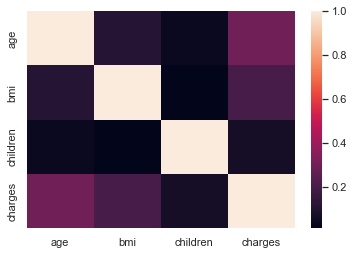

In [283]:
sns.heatmap(df.corr())

The correlation between the fields are indicated by the use of colors. From this heatmap also it can be observed that rm has the highest correlation with medv, and lstat has the highest negative correlation with medv

### 2. Scatter Plot 

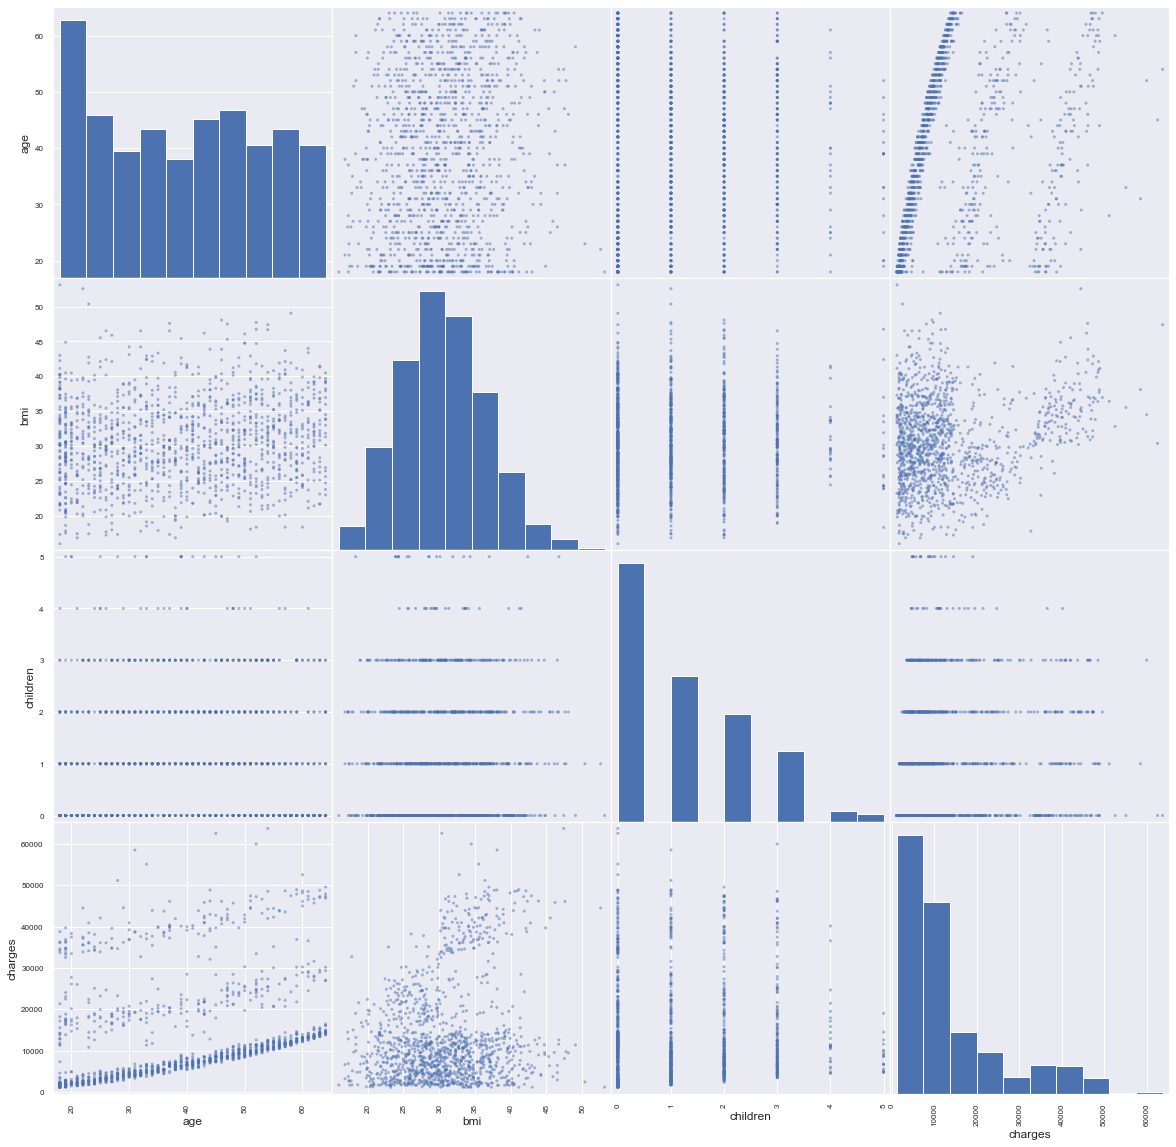

In [284]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(20, 20));

### 3. Histogram 

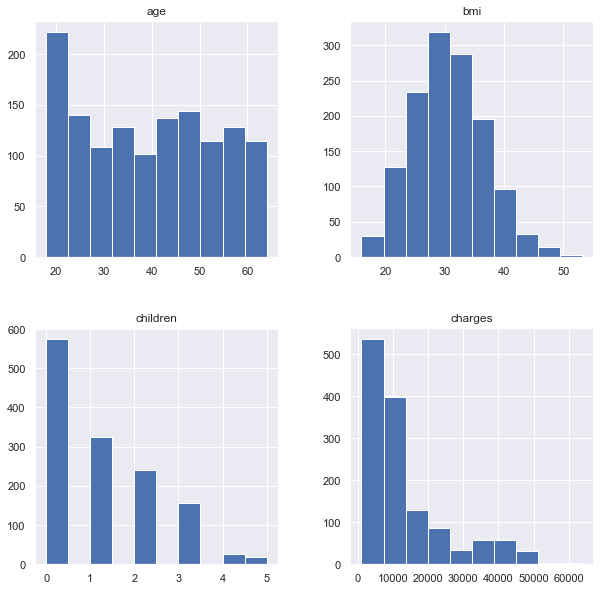

In [285]:
df.hist(bins=10,figsize=(10,10))
plt.show()

### 4. Count Plot

i)Gender column:

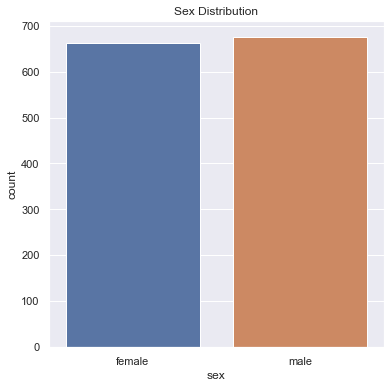

In [286]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex' , data=df)
plt.title('Sex Distribution')
plt.show()

ii)Children column:

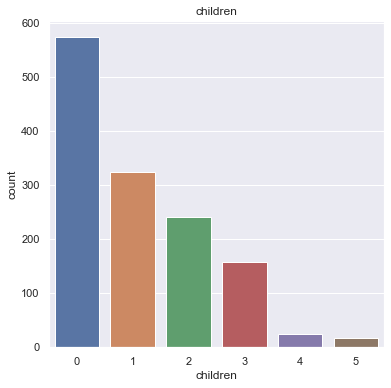

In [287]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data= df)
plt.title('children')
plt.show()

iii)Smoker column:

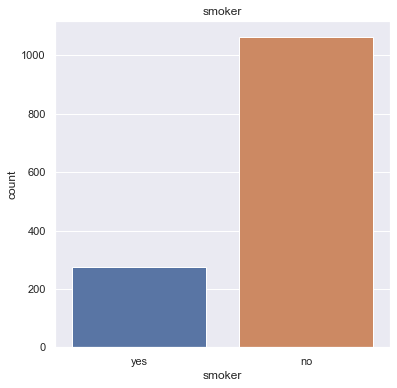

In [288]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data= df)
plt.title('smoker')
plt.show()

iv) Region column:

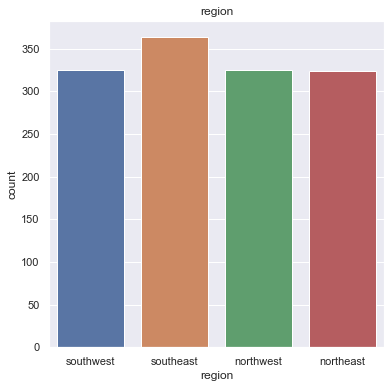

In [289]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data= df)
plt.title('region')
plt.show()

5.DISTRIBUTION PLOT FOR CHARGES:

C:\Users\tanup\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


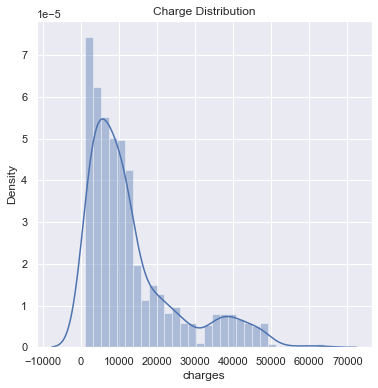

In [290]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charge Distribution')
plt.show()

In [291]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Data Pre-processing

Encoding the Catagorical Feature(Change into Numerical Value)

In [292]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [293]:
for cols in df.columns:
    le = LabelEncoder()
    df[cols] = le.fit_transform(df[cols])

In [294]:
df

,age,sex,bmi,children,smoker,region,charges
0,1,0,197,0,1,3,1005
1,0,1,350,1,0,2,57
2,10,1,331,3,0,2,306
3,15,1,73,0,0,1,1097
4,14,1,223,0,0,1,254
...,...,...,...,...,...,...,...
1333,32,1,276,3,0,1,746
1334,0,0,302,0,0,0,118
1335,0,0,422,0,0,2,32
1336,3,0,146,0,0,3,91


 SEX  => Female = 0 , Male = 1<br> SMOKER  => No = 0 , Yes = 1<br>REGION => Southwest = 3, Southeast = 2 , Northwest = 1 , Northeast = 0

In [373]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.112052,0.042469,-0.025019,0.002127,0.534522
sex,-0.020856,1.000000,0.044714,0.017163,0.076185,0.004588,0.009533
bmi,0.112052,0.044714,1.000000,0.011228,0.002085,0.155176,0.119902
children,0.042469,0.017163,0.011228,1.000000,0.007673,0.016569,0.126132
smoker,-0.025019,0.076185,0.002085,0.007673,1.000000,-0.002181,0.663509
region,0.002127,0.004588,0.155176,0.016569,-0.002181,1.000000,-0.043780
charges,0.534522,0.009533,0.119902,0.126132,0.663509,-0.043780,1.000000


<AxesSubplot:>

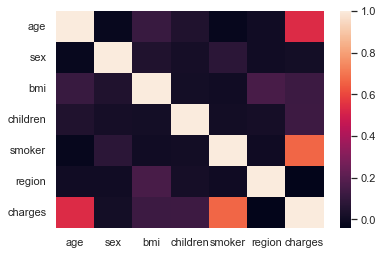

In [374]:
sns.heatmap(df.corr())

In [375]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Splitting the Features and Target

In [376]:
x=df.drop(["charges"],axis=1)
y= df["charges"]

In [377]:
print(x)

      age  sex  bmi  children  smoker  region
0       1    0  197         0       1       3
1       0    1  350         1       0       2
2      10    1  331         3       0       2
3      15    1   73         0       0       1
4      14    1  223         0       0       1
...   ...  ...  ...       ...     ...     ...
1333   32    1  276         3       0       1
1334    0    0  302         0       0       0
1335    0    0  422         0       0       2
1336    3    0  146         0       0       3
1337   43    0  229         0       1       1

[1338 rows x 6 columns]


In [378]:
print(y)

0       1005
1         57
2        306
3       1097
4        254
        ... 
1333     746
1334     118
1335      32
1336      91
1337    1171
Name: charges, Length: 1338, dtype: int64


# Splitting the Data Into Training Data And Testing Data

In [367]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33 , random_state=42)

In [368]:
X_train

,age,sex,bmi,children,smoker,region
1046,25,0,129,0,0,0
682,21,1,384,2,1,3
1037,27,0,267,1,1,1
490,1,0,329,0,0,3
39,42,1,480,0,1,3
...,...,...,...,...,...,...
1095,0,0,287,4,0,0
1130,21,0,101,5,0,2
1294,40,1,131,0,0,0
860,19,0,541,2,1,3


In [369]:
y_train

1046     528
682     1259
1037    1252
490       65
39      1321
        ... 
1095     318
1130     616
1294     839
860     1303
1126     723
Name: charges, Length: 896, dtype: int64

In [370]:
X_test

,age,sex,bmi,children,smoker,region
764,27,0,131,2,0,0
887,18,0,255,0,0,1
890,46,0,171,0,1,1
1293,28,1,145,3,0,1
259,1,1,302,0,1,1
...,...,...,...,...,...,...
644,25,1,385,2,0,2
602,38,0,134,0,0,3
731,35,1,49,1,0,3
321,8,0,245,4,0,0


In [371]:
y_test

764      649
887      380
890     1173
1293     664
259     1190
        ... 
644     1037
602      774
731      712
321     1131
479       69
Name: charges, Length: 442, dtype: int64

4 DIFFERENT MODELS TO SOLVE THIS PROBLEM( LINEAR, SVM, RANDOMFOREST, POLYNOMIAL)

**1.LINEAR REGRESSION**

In [372]:
#Linear regression
reg = LinearRegression()
model = reg.fit(X_train, y_train)

In [307]:
model.coef_

array([ 1.46975908e+01, -3.00443514e+01,  2.11922212e-01,  2.51877574e+01,
        6.52872285e+02, -1.93140110e+01])

In [308]:
model.intercept_

184.14500914335855

In [309]:
y_pred  = model.predict(X_test)


In [310]:
# y_pred

In [311]:
err_lin=mean_absolute_error(y_test, y_pred)

In [312]:
err_lin

125.61926249329221

In [313]:
ms_err_lin=mean_squared_error(y_test, y_pred)

In [314]:
rms_err_lin=np.sqrt(mean_squared_error(y_test, y_pred))

In [315]:
r2_lin=r2_score(y_test, y_pred)

In [316]:
r2_lin

0.7617982540821593

**2.SVM**

In [317]:
svm = SVR()
model_svm=svm.fit(X_train,y_train)

In [318]:
y_pred_svm  = model_svm.predict(X_test)


In [319]:
err_svm=mean_absolute_error(y_test, y_pred_svm)

In [320]:
ms_err_svm=mean_squared_error(y_test, y_pred_svm)

In [321]:
rms_err_svm=np.sqrt(mean_squared_error(y_test, y_pred_svm))

In [322]:
r2_svm=r2_score(y_test, y_pred_svm)

In [323]:
r2_svm

0.008203801150203693

**3.Random Forest Regressor**

In [324]:
rf = RandomForestRegressor()
model_rf=rf.fit(X_train,y_train)

In [325]:
y_pred_rf  = model_rf.predict(X_test)


In [326]:
err_rf=mean_absolute_error(y_test, y_pred_rf)

In [327]:
ms_err_rf= mean_squared_error(y_test, y_pred_rf)

In [328]:
rms_err_rf= np.sqrt(mean_squared_error(y_test, y_pred_rf))

In [329]:
r2_rf=r2_score(y_test, y_pred_rf)

In [332]:
r2_rf

0.7804258759442456

**4.Polynomial regression**

In [333]:
poly = PolynomialFeatures(2)

In [334]:
poly.fit(X_train)


PolynomialFeatures()

In [335]:
X_train_poly = poly.transform(X_train) 
X_test_poly = poly.transform(X_test)


In [336]:
reg_poly = LinearRegression()

In [337]:
model_poly = reg_poly.fit(X_train_poly, y_train)

In [338]:
model_poly.coef_ 

array([-7.91396788e-10,  1.23297292e+01, -4.10258857e+01,  2.11410754e-01,
        7.28854066e+01,  3.93740880e+02, -2.90279972e+01,  1.14862046e-01,
        4.48875309e-01, -3.34963246e-04, -8.23624478e-01, -1.49043871e+01,
        7.75889463e-01, -4.10258857e+01,  1.35542736e-01, -7.42103892e-01,
        3.04125522e+01,  1.66406310e+00, -2.21697272e-04,  1.76743893e-02,
        5.72117695e-01, -7.68369730e-02, -2.61947592e+00, -3.56243561e+01,
       -6.22212628e+00,  3.93740880e+02,  2.77606558e+01,  3.81913536e+00])

In [339]:
model_poly.intercept_ 

171.45868445600786

In [340]:
y_pred_poly = model_poly.predict(X_test_poly)


In [341]:
err_poly= mean_absolute_error(y_test, y_pred_poly)


In [342]:
ms_err_poly=mean_squared_error(y_test, y_pred_poly)

In [343]:
rms_err_poly= np.sqrt(mean_squared_error(y_test, y_pred_poly))

In [344]:
r2_poly= r2_score(y_test, y_pred_poly)

In [345]:
r2_poly

0.8188738870035701

**COMPARISON BETWEEN ALL 4 MODELS:**

In [346]:
df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred,'svm':y_pred_svm,'rf':y_pred_rf,'poly':y_pred_poly})

In [347]:
df1

,Actual,Lr,svm,rf,poly
764,649,659.117285,662.065010,638.16,706.249180
887,380,483.427796,677.505076,387.10,437.729230
890,1173,1530.031158,669.231816,1163.86,1233.523751
1293,664,652.611182,663.761287,636.76,681.277699
259,1190,866.357031,681.456729,1196.44,1144.315946
...,...,...,...,...,...
644,1037,614.877972,692.202241,633.18,599.679729
602,774,713.109002,663.662048,789.72,833.342964
731,712,646.146248,656.602712,762.44,738.608453
321,1131,454.397707,674.796609,565.67,555.874347


In [348]:
df2 = pd.DataFrame({'ERROR SCORE':['ABSOLUTE','MEAN SQUARE','ROOT MEAN SQUARE','R2 SCORE'],'LR':[err_lin,ms_err_lin,rms_err_lin,r2_lin],'SVM':[err_svm,ms_err_svm,rms_err_svm,r2_svm],'RF':[err_rf,ms_err_rf,rms_err_rf,r2_rf],'POLY':[err_poly,ms_err_poly,rms_err_poly,r2_poly]})

In [349]:
df2

,ERROR SCORE,LR,SVM,RF,POLY
0,ABSOLUTE,125.619262,334.742407,89.895633,86.197006
1,MEAN SQUARE,35615.510333,148291.640903,32830.340743,27081.661069
2,ROOT MEAN SQUARE,188.720720,385.086537,181.191448,164.565066
3,R2 SCORE,0.761798,0.008204,0.780426,0.818874


Here we can see that R2 Score value for ploynomial regression is most Near by 1 than According to that we will use **Polynomial Regression** for our model 

## Using The Model For some rows from the Test data set:

**Example-1**

In [350]:
input_data_1=[28,1,145,3,0,1]
input_data_as_array_1=np.asarray(input_data_1)
reshaped_array_1=input_data_as_array_1.reshape(1,-1)
reshaped_array_poly_1= poly.transform(reshaped_array_1)

In [351]:
y_pred_lin_1= model.predict(reshaped_array_1)
y_pred_poly_1=model_poly.predict(reshaped_array_poly_1)
y_pred_svm_1= model_svm.predict(reshaped_array_1)
y_pred_rf_1= model_rf.predict(reshaped_array_1)

In [352]:
print("Actual charges value: 664")
print("Predicted charges value:")
print("Linear model :",y_pred_lin_1)
print("SVM model :",y_pred_svm_1)
print("RandomForest model :",y_pred_rf_1)
print("Polynomial model :",y_pred_poly_1)

Actual charges value: 664
Predicted charges value:
Linear model : [652.61118151]
SVM model : [663.7612872]
RandomForest model : [636.76]
Polynomial model : [681.27769857]


**Example-2**

In [353]:
input_data_2=[35,	1,	49,	1,	0	,3]
input_data_as_array_2=np.asarray(input_data_2)
reshaped_array_2=input_data_as_array_2.reshape(1,-1)
reshaped_array_poly_2= poly.transform(reshaped_array_2)

In [354]:
y_pred_lin_2= model.predict(reshaped_array_2)
y_pred_poly_2=model_poly.predict(reshaped_array_poly_2)
y_pred_svm_2= model_svm.predict(reshaped_array_2)
y_pred_rf_2= model_rf.predict(reshaped_array_2)

In [355]:
print("Actual charges value: 712")
print("Predicted charges value:")
print("Linear model :",y_pred_lin_2)
print("SVM model :",y_pred_svm_2)
print("RandomForest model :",y_pred_rf_2)
print("Polynomial model :",y_pred_poly_2)

Actual charges value: 712
Predicted charges value:
Linear model : [646.1462477]
SVM model : [656.60271175]
RandomForest model : [762.44]
Polynomial model : [738.60845295]


**Example-3**

In [356]:
input_data_3=[16,	1,	48,	0,	0,	0]
input_data_as_array_3=np.asarray(input_data_3)
reshaped_array_3=input_data_as_array_3.reshape(1,-1)
reshaped_array_poly_3= poly.transform(reshaped_array_3)

In [357]:
y_pred_lin_3= model.predict(reshaped_array_3)
y_pred_poly_3=model_poly.predict(reshaped_array_poly_3)
y_pred_svm_3= model_svm.predict(reshaped_array_3)
y_pred_rf_3= model_rf.predict(reshaped_array_3)

In [358]:
print("Actual charges value: 311")
print("Predicted charges value:")
print("Linear model :",y_pred_lin_3)
print("SVM model :",y_pred_svm_3)
print("RandomForest model :",y_pred_rf_3)
print("Polynomial model :",y_pred_poly_3)

Actual charges value: 311
Predicted charges value:
Linear model : [399.43437638]
SVM model : [654.87945453]
RandomForest model : [357.8]
Polynomial model : [339.15499444]


# Using the model for a new customer:


In [359]:
input_data_new=[32,	1	,360,	1	,1,	2]
input_data_as_array_new=np.asarray(input_data_new)
reshaped_array_new=input_data_as_array_new.reshape(1,-1)
reshaped_array_poly_new= poly.transform(reshaped_array_new)

In [360]:
y_pred_lin_new= model.predict(reshaped_array_new)
y_pred_poly1_new=model_poly.predict(reshaped_array_poly_new)
y_pred_svm1_new= model_svm.predict(reshaped_array_new)
y_pred_rf1_new= model_rf.predict(reshaped_array_new)

In [361]:

print("Predicted charges value:")
print("Linear model :",y_pred_lin_new)
print("SVM model :",y_pred_svm1_new)
print("RandomForest model :",y_pred_rf1_new)
print("Polynomial model :",y_pred_poly1_new)

Predicted charges value:
Linear model : [1340.14757971]
SVM model : [691.32988093]
RandomForest model : [1277.01]
Polynomial model : [1267.03610563]


# Saving the Model

In [362]:
from joblib import dump,load
dump(y_pred_poly1_new,'Final_Majorproject.joblib')

['Final_Majorproject.joblib']